In [1]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving daftar_siklus.csv to daftar_siklus.csv


In [2]:
budidaya = pd.read_csv("Budidaya.csv", header=0)
budidaya.head(5)

,Kode Siklus,Age,Date,ABW,Size,Total Weight,Feed,Feed Accumulation,Survival Rate,Panen,Berat Panen
0,50,0,7/16/2018,NaN,NaN,NaN,NaN,0.0,100.00,NaN,NaN
1,50,1,7/17/2018,NaN,NaN,NaN,2.5,2.5,78.13,NaN,NaN
2,50,2,7/18/2018,NaN,NaN,NaN,3.0,5.5,88.24,NaN,NaN
3,50,3,7/19/2018,NaN,NaN,NaN,3.0,8.5,83.33,NaN,NaN
4,50,4,7/20/2018,NaN,NaN,NaN,3.0,11.5,78.95,NaN,NaN


In [3]:
daftar_siklus = pd.read_csv('daftar_siklus.csv')
daftar_siklus.head(5)

,Kode Siklus,Kode Kolam,Panjang Kolam,Lebar Kolam,Kedalaman Kolam,Tanggal Tebar,Tanggal Selesai Siklus,Jumlah Benur,Daerah
0,50,2266,115.47,86.60,100.0,2018-07-16,2018-11-13,100000,BANTUL
1,66,3,36.20,46.40,1.1,2018-07-20,2018-11-08,200000,PURWOREJO
2,295,3418,79.16,59.37,1.5,2019-01-05,2019-03-03,583740,LAMPUNG SELATAN
3,298,3421,79.16,59.37,1.5,2019-01-10,2019-03-10,588432,LAMPUNG SELATAN
4,812,4,49.90,36.30,0.9,2019-05-07,2019-08-01,175000,PURWOREJO


In [4]:
df_siklus= daftar_siklus[['Kode Siklus','Kode Kolam']]
df_siklus

,Kode Siklus,Kode Kolam
0,50,2266
1,66,3
2,295,3418
3,298,3421
4,812,4


In [5]:
budidaya1 = pd.merge(budidaya, df_siklus, on='Kode Siklus')

In [6]:
budidaya1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 437
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kode Siklus        438 non-null    int64  
 1   Age                438 non-null    int64  
 2   Date               438 non-null    object 
 3   ABW                34 non-null     float64
 4   Size               34 non-null     float64
 5   Total Weight       34 non-null     float64
 6   Feed               364 non-null    float64
 7   Feed Accumulation  438 non-null    float64
 8   Survival Rate      438 non-null    float64
 9   Panen              7 non-null      float64
 10  Berat Panen        7 non-null      float64
 11  Kode Kolam         438 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 44.5+ KB


In [7]:
budidaya1.head()

,Kode Siklus,Age,Date,ABW,Size,Total Weight,Feed,Feed Accumulation,Survival Rate,Panen,Berat Panen,Kode Kolam
0,50,0,7/16/2018,NaN,NaN,NaN,NaN,0.0,100.00,NaN,NaN,2266
1,50,1,7/17/2018,NaN,NaN,NaN,2.5,2.5,78.13,NaN,NaN,2266
2,50,2,7/18/2018,NaN,NaN,NaN,3.0,5.5,88.24,NaN,NaN,2266
3,50,3,7/19/2018,NaN,NaN,NaN,3.0,8.5,83.33,NaN,NaN,2266
4,50,4,7/20/2018,NaN,NaN,NaN,3.0,11.5,78.95,NaN,NaN,2266


In [8]:
budidaya1['Kode Siklus']= budidaya1['Kode Siklus'].astype('object')

In [9]:
budidaya2= budidaya1[budidaya1['Berat Panen'].notnull()]
budidaya2

,Kode Siklus,Age,Date,ABW,Size,Total Weight,Feed,Feed Accumulation,Survival Rate,Panen,Berat Panen,Kode Kolam
51,50,51,9/5/2018,6.67,150.0,545.806100,0.0,559.0,81.83,81830.0,532.75,2266
187,66,66,9/24/2018,10.53,95.0,1217.025810,43.0,2117.0,81.30,47019.0,483.62,3
206,66,85,10/13/2018,12.35,81.0,983.097050,44.0,2985.0,83.27,39922.0,475.05,3
218,66,97,10/25/2018,13.70,73.0,703.481300,27.0,3380.0,83.58,28861.0,379.65,3
232,66,111,11/8/2018,15.38,65.0,2861.602800,21.0,3674.0,93.03,70262.0,910.11,3
350,298,59,3/10/2019,9.17,109.0,4973.420791,0.0,5834.0,92.17,542368.0,4975.85,3421
437,812,86,8/1/2019,15.87,63.0,799.014825,0.0,1630.0,28.77,50353.0,734.58,4


In [10]:
budidaya3= budidaya2.groupby('Kode Kolam')['Berat Panen'].sum()
budidaya3


Kode Kolam
3       2248.43
4        734.58
2266     532.75
3421    4975.85
Name: Berat Panen, dtype: float64

In [11]:
budidaya4= budidaya2.groupby('Kode Kolam')['Panen'].sum()
budidaya4

Kode Kolam
3       186064.0
4        50353.0
2266     81830.0
3421    542368.0
Name: Panen, dtype: float64

In [ ]:
budidaya1 = budidaya.iloc[:, 0:9]
budidaya1

,Kode Siklus,Age,Date,ABW,Size,Total Weight,Feed,Feed Accumulation,Survival Rate
0,50,0,7/16/2018,NaN,NaN,NaN,NaN,0.0,100.00
1,50,1,7/17/2018,NaN,NaN,NaN,2.5,2.5,78.13
2,50,2,7/18/2018,NaN,NaN,NaN,3.0,5.5,88.24
3,50,3,7/19/2018,NaN,NaN,NaN,3.0,8.5,83.33
4,50,4,7/20/2018,NaN,NaN,NaN,3.0,11.5,78.95
...,...,...,...,...,...,...,...,...,...
433,812,82,7/28/2019,NaN,NaN,NaN,24.0,1558.0,33.51
434,812,83,7/29/2019,NaN,NaN,NaN,24.0,1582.0,33.18
435,812,84,7/30/2019,NaN,NaN,NaN,24.0,1606.0,32.86
436,812,85,7/31/2019,NaN,NaN,NaN,24.0,1630.0,32.55


In [ ]:
budidaya2= budidaya1[budidaya1['Feed '].notnull()]
budidaya2

,Kode Siklus,Age,Date,ABW,Size,Total Weight,Feed,Feed Accumulation,Survival Rate
1,50,1,7/17/2018,NaN,NaN,NaN,2.5,2.5,78.13
2,50,2,7/18/2018,NaN,NaN,NaN,3.0,5.5,88.24
3,50,3,7/19/2018,NaN,NaN,NaN,3.0,8.5,83.33
4,50,4,7/20/2018,NaN,NaN,NaN,3.0,11.5,78.95
5,50,5,7/21/2018,NaN,NaN,NaN,3.0,14.5,75.00
...,...,...,...,...,...,...,...,...,...
432,812,81,7/27/2019,NaN,NaN,NaN,24.0,1534.0,33.84
433,812,82,7/28/2019,NaN,NaN,NaN,24.0,1558.0,33.51
434,812,83,7/29/2019,NaN,NaN,NaN,24.0,1582.0,33.18
435,812,84,7/30/2019,NaN,NaN,NaN,24.0,1606.0,32.86


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

## **Data Pre-Processing**

In [ ]:
df=pd.read_csv("kualitas_air.csv", parse_dates=['Waktu Pengukuran'])

In [ ]:
df

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH
0,2018-07-16 07:00:00+07:00,50,26.70,15.90,22.40,5.80
1,2018-07-16 17:00:00+07:00,50,28.90,15.20,22.70,7.62
2,2018-07-17 07:00:00+07:00,50,25.80,11.30,22.60,7.70
3,2018-07-17 17:00:00+07:00,50,28.90,14.20,22.80,8.46
4,2018-07-18 07:00:00+07:00,50,26.00,8.70,22.60,8.30
...,...,...,...,...,...,...
576,2019-07-29 16:16:38+07:00,812,27.59,7.10,28.31,8.16
577,2019-07-30 07:00:00+07:00,812,25.00,7.20,NaN,7.60
578,2019-07-30 16:09:59+07:00,812,28.44,7.65,28.00,7.86
579,2019-07-31 07:00:00+07:00,812,26.00,6.60,NaN,7.60


In [ ]:
df['tahun']= df['Waktu Pengukuran'].dt.year
df['bulan']= df['Waktu Pengukuran'].dt.month
df['day']= df['Waktu Pengukuran'].dt.day
df['jam']= df['Waktu Pengukuran'].dt.hour

In [ ]:
df

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam
0,2018-07-16 07:00:00+07:00,50,26.70,15.90,22.40,5.80,2018,7,16,7
1,2018-07-16 17:00:00+07:00,50,28.90,15.20,22.70,7.62,2018,7,16,17
2,2018-07-17 07:00:00+07:00,50,25.80,11.30,22.60,7.70,2018,7,17,7
3,2018-07-17 17:00:00+07:00,50,28.90,14.20,22.80,8.46,2018,7,17,17
4,2018-07-18 07:00:00+07:00,50,26.00,8.70,22.60,8.30,2018,7,18,7
...,...,...,...,...,...,...,...,...,...,...
576,2019-07-29 16:16:38+07:00,812,27.59,7.10,28.31,8.16,2019,7,29,16
577,2019-07-30 07:00:00+07:00,812,25.00,7.20,NaN,7.60,2019,7,30,7
578,2019-07-30 16:09:59+07:00,812,28.44,7.65,28.00,7.86,2019,7,30,16
579,2019-07-31 07:00:00+07:00,812,26.00,6.60,NaN,7.60,2019,7,31,7


In [ ]:
df['jam'].unique()

array([ 7, 17, 14, 15,  8, 16, 23, 12, 10,  6,  5, 20,  9, 21, 19])

In [ ]:
conditions = [
              (df['jam'] > 1) & (df['jam'] <=10),
              (df['jam'] > 10) & (df['jam'] <=15),
              (df['jam'] > 15) & (df['jam'] <=18),
              (df['jam'] > 18) & (df['jam'] <=24)
              ]
value=['Pagi','Siang','Sore','Malam']

df['keterangan']= np.select(conditions,value)

In [ ]:
df

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan
0,2018-07-16 07:00:00+07:00,50,26.70,15.90,22.40,5.80,2018,7,16,7,Pagi
1,2018-07-16 17:00:00+07:00,50,28.90,15.20,22.70,7.62,2018,7,16,17,Sore
2,2018-07-17 07:00:00+07:00,50,25.80,11.30,22.60,7.70,2018,7,17,7,Pagi
3,2018-07-17 17:00:00+07:00,50,28.90,14.20,22.80,8.46,2018,7,17,17,Sore
4,2018-07-18 07:00:00+07:00,50,26.00,8.70,22.60,8.30,2018,7,18,7,Pagi
...,...,...,...,...,...,...,...,...,...,...,...
576,2019-07-29 16:16:38+07:00,812,27.59,7.10,28.31,8.16,2019,7,29,16,Sore
577,2019-07-30 07:00:00+07:00,812,25.00,7.20,NaN,7.60,2019,7,30,7,Pagi
578,2019-07-30 16:09:59+07:00,812,28.44,7.65,28.00,7.86,2019,7,30,16,Sore
579,2019-07-31 07:00:00+07:00,812,26.00,6.60,NaN,7.60,2019,7,31,7,Pagi


In [ ]:
df.describe()

,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam
count,581.000000,578.00000,569.000000,521.000000,576.000000,581.000000,581.000000,581.000000,581.000000
mean,295.442341,28.66891,5.630334,31.002668,7.704323,2018.495697,6.359725,16.266781,12.631670
std,300.040242,6.07209,2.397833,7.113786,1.041173,0.500412,2.772966,8.872823,5.321585
min,50.000000,24.00000,0.000000,0.000000,2.750000,2018.000000,1.000000,1.000000,5.000000
25%,66.000000,27.00000,4.450000,27.380000,7.530000,2018.000000,3.000000,8.000000,7.000000
50%,66.000000,28.31000,5.340000,30.910000,7.860000,2018.000000,7.000000,17.000000,15.000000
75%,298.000000,29.62250,6.400000,37.160000,8.240000,2019.000000,8.000000,24.000000,17.000000
max,812.000000,127.00000,18.260000,39.740000,9.770000,2019.000000,11.000000,31.000000,23.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   Waktu Pengukuran  581 non-null    datetime64[ns, pytz.FixedOffset(420)]
 1   Kode Siklus       581 non-null    int64                                
 2   Suhu Air          578 non-null    float64                              
 3   Oksigen Terlarut  569 non-null    float64                              
 4   Salinitas         521 non-null    float64                              
 5   pH                576 non-null    float64                              
 6   tahun             581 non-null    int64                                
 7   bulan             581 non-null    int64                                
 8   day               581 non-null    int64                                
 9   jam               581 non-null    int64    

In [ ]:
df.isna().sum()

Waktu Pengukuran     0
Kode Siklus          0
Suhu Air             3
Oksigen Terlarut    12
Salinitas           60
pH                   5
tahun                0
bulan                0
day                  0
jam                  0
keterangan           0
dtype: int64

In [ ]:
df1= df.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 580
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   Waktu Pengukuran  515 non-null    datetime64[ns, pytz.FixedOffset(420)]
 1   Kode Siklus       515 non-null    int64                                
 2   Suhu Air          515 non-null    float64                              
 3   Oksigen Terlarut  515 non-null    float64                              
 4   Salinitas         515 non-null    float64                              
 5   pH                515 non-null    float64                              
 6   tahun             515 non-null    int64                                
 7   bulan             515 non-null    int64                                
 8   day               515 non-null    int64                                
 9   jam               515 non-null    int64    

In [ ]:
df1.describe()

,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,234.209709,28.873068,5.608388,31.062893,7.690194,2018.434951,6.384466,16.184466,12.631068
std,255.747129,6.375600,2.497198,7.126711,1.075910,0.496233,2.914433,8.927014,5.357257
min,50.000000,24.000000,0.000000,0.000000,2.750000,2018.000000,2.000000,1.000000,5.000000
25%,50.000000,27.310000,4.390000,27.420000,7.535000,2018.000000,3.000000,8.000000,7.000000
50%,66.000000,28.500000,5.260000,30.990000,7.850000,2018.000000,7.000000,17.000000,15.000000
75%,298.000000,29.690000,6.340000,37.225000,8.240000,2019.000000,8.000000,24.000000,17.000000
max,812.000000,127.000000,18.260000,39.740000,9.770000,2019.000000,11.000000,31.000000,23.000000


In [ ]:
daftar_siklus = pd.read_csv('daftar_siklus.csv')
daftar_siklus

,Kode Siklus,Kode Kolam,Panjang Kolam,Lebar Kolam,Kedalaman Kolam,Tanggal Tebar,Tanggal Selesai Siklus,Jumlah Benur,Daerah
0,50,2266,115.47,86.60,100.0,2018-07-16,2018-11-13,100000,BANTUL
1,66,3,36.20,46.40,1.1,2018-07-20,2018-11-08,200000,PURWOREJO
2,295,3418,79.16,59.37,1.5,2019-01-05,2019-03-03,583740,LAMPUNG SELATAN
3,298,3421,79.16,59.37,1.5,2019-01-10,2019-03-10,588432,LAMPUNG SELATAN
4,812,4,49.90,36.30,0.9,2019-05-07,2019-08-01,175000,PURWOREJO


In [ ]:
df2= daftar_siklus[['Kode Siklus','Kode Kolam']]
df2

,Kode Siklus,Kode Kolam
0,50,2266
1,66,3
2,295,3418
3,298,3421
4,812,4


In [ ]:
df3 = pd.merge(df1, df2, on='Kode Siklus')

In [ ]:
df3

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
0,2018-07-16 07:00:00+07:00,50,26.70,15.90,22.40,5.80,2018,7,16,7,Pagi,2266
1,2018-07-16 17:00:00+07:00,50,28.90,15.20,22.70,7.62,2018,7,16,17,Sore,2266
2,2018-07-17 07:00:00+07:00,50,25.80,11.30,22.60,7.70,2018,7,17,7,Pagi,2266
3,2018-07-17 17:00:00+07:00,50,28.90,14.20,22.80,8.46,2018,7,17,17,Sore,2266
4,2018-07-18 07:00:00+07:00,50,26.00,8.70,22.60,8.30,2018,7,18,7,Pagi,2266
...,...,...,...,...,...,...,...,...,...,...,...,...
510,2019-07-29 07:32:21+07:00,812,24.85,6.58,28.09,7.00,2019,7,29,7,Pagi,4
511,2019-07-29 16:16:36+07:00,812,27.72,7.10,28.31,8.16,2019,7,29,16,Sore,4
512,2019-07-29 16:16:38+07:00,812,27.59,7.10,28.31,8.16,2019,7,29,16,Sore,4
513,2019-07-30 16:09:59+07:00,812,28.44,7.65,28.00,7.86,2019,7,30,16,Sore,4


## **Kolam 2266**

In [ ]:
kolam2266= df3[df3['Kode Kolam']==2266]
kolam2266

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
0,2018-07-16 07:00:00+07:00,50,26.70,15.90,22.40,5.80,2018,7,16,7,Pagi,2266
1,2018-07-16 17:00:00+07:00,50,28.90,15.20,22.70,7.62,2018,7,16,17,Sore,2266
2,2018-07-17 07:00:00+07:00,50,25.80,11.30,22.60,7.70,2018,7,17,7,Pagi,2266
3,2018-07-17 17:00:00+07:00,50,28.90,14.20,22.80,8.46,2018,7,17,17,Sore,2266
4,2018-07-18 07:00:00+07:00,50,26.00,8.70,22.60,8.30,2018,7,18,7,Pagi,2266
...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-09-03 08:28:18+07:00,50,28.13,5.41,29.80,7.01,2018,9,3,8,Pagi,2266
130,2018-09-03 15:24:02+07:00,50,31.56,5.90,30.51,7.76,2018,9,3,15,Siang,2266
131,2018-09-04 08:30:53+07:00,50,27.63,4.57,30.37,7.39,2018,9,4,8,Pagi,2266
132,2018-09-05 08:30:39+07:00,50,27.44,5.38,29.95,6.73,2018,9,5,8,Pagi,2266


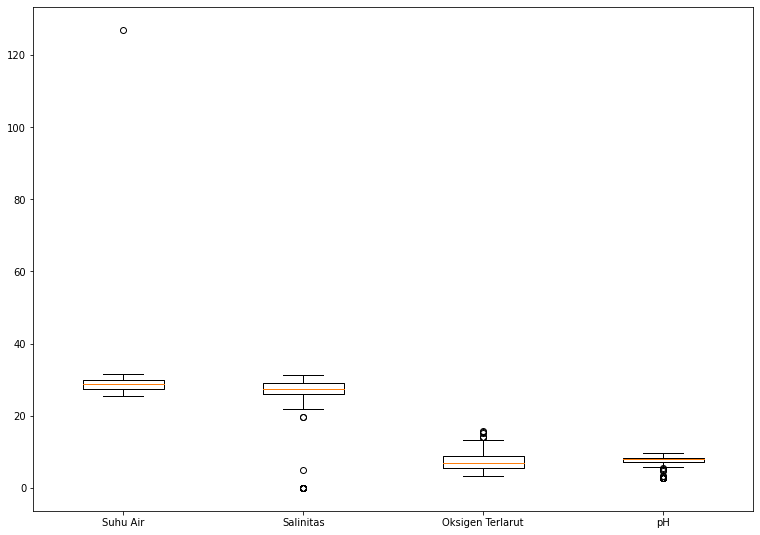

In [ ]:
import matplotlib.pyplot as plt

data = [kolam2266['Suhu Air'], kolam2266['Salinitas'], kolam2266['Oksigen Terlarut'], kolam2266['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam2266['Suhu Air'].quantile(0.25)
Q3 = kolam2266['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266.shape)

# Removing outliers
kolam2266SA = kolam2266[~((kolam2266['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam2266['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266SA.shape)

Shape awal:  (134, 12)
Shape akhir:  (133, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam2266['Salinitas'].quantile(0.25)
Q3 = kolam2266['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266.shape)

# Removing outliers
kolam2266S = kolam2266[~((kolam2266['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam2266['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266S.shape)

Shape awal:  (134, 12)
Shape akhir:  (121, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam2266['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam2266['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266.shape)

# Removing outliers
kolam2266OT = kolam2266[~((kolam2266['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam2266['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266OT.shape)

Shape awal:  (134, 12)
Shape akhir:  (127, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam2266['pH'].quantile(0.25)
Q3 = kolam2266['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266.shape)

# Removing outliers
kolam2266pH = kolam2266[~((kolam2266['pH'] < (Q1 - 1.5 * IQR)) | (kolam2266['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266pH.shape)

Shape awal:  (134, 12)
Shape akhir:  (116, 12)


In [ ]:
print('Mean Suhu Air : ', kolam2266SA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam2266OT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam2266S['Salinitas'].mean())
print('Mean pH: ', kolam2266pH['pH'].mean())

Mean Suhu Air :  28.592255639097765
Mean Oksigen Terlarut:  7.000787401574804
Mean Salinitas:  27.7204958677686
Mean pH:  7.863275862068963


### **Kolam2266 Pagi**


In [ ]:
kolam2266pagi= kolam2266[kolam2266['keterangan']=='Pagi']
kolam2266pagi.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
0,2018-07-16 07:00:00+07:00,50,26.7,15.9,22.4,5.80,2018,7,16,7,Pagi,2266
2,2018-07-17 07:00:00+07:00,50,25.8,11.3,22.6,7.70,2018,7,17,7,Pagi,2266
4,2018-07-18 07:00:00+07:00,50,26.0,8.7,22.6,8.30,2018,7,18,7,Pagi,2266
6,2018-07-19 07:00:00+07:00,50,26.4,4.8,22.8,8.11,2018,7,19,7,Pagi,2266
8,2018-07-20 07:00:00+07:00,50,26.9,3.7,25.3,8.11,2018,7,20,7,Pagi,2266


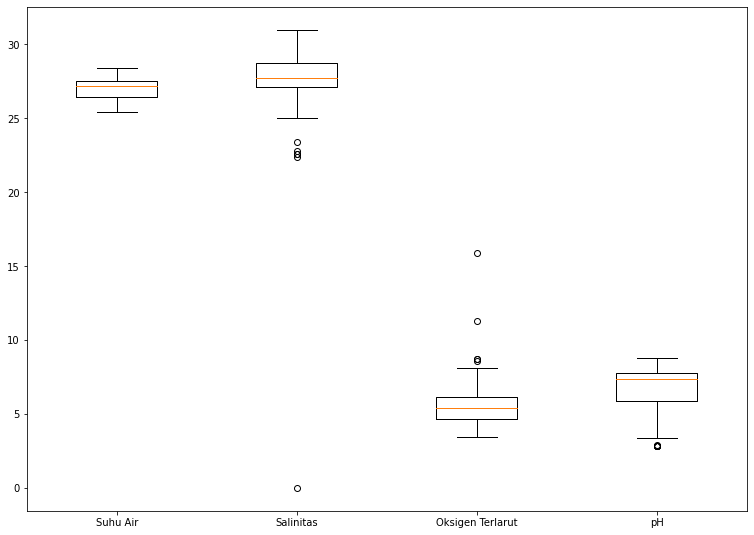

In [ ]:
data = [kolam2266pagi['Suhu Air'], kolam2266pagi['Salinitas'], kolam2266pagi['Oksigen Terlarut'], kolam2266pagi['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam2266pagi['Salinitas'].quantile(0.25)
Q3 = kolam2266pagi['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266pagi.shape)

# Removing outliers
kolam2266pagiS = kolam2266pagi[~((kolam2266pagi['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam2266pagi['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266pagiS.shape)

Shape awal:  (49, 12)
Shape akhir:  (43, 12)


In [ ]:
##Remove Outlier Column Oksigen Terlarut
# Q1, Q3, dan IQR
Q1 = kolam2266pagi['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam2266pagi['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266pagi.shape)

# Removing outliers
kolam2266pagiOT = kolam2266pagi[~((kolam2266pagi['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam2266pagi['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266pagiOT.shape)

Shape awal:  (49, 12)
Shape akhir:  (44, 12)


In [ ]:
##Remove Outlier Column pH
# Q1, Q3, dan IQR
Q1 = kolam2266pagi['pH'].quantile(0.25)
Q3 = kolam2266pagi['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266pagi.shape)

# Removing outliers
kolam2266pagipH = kolam2266pagi[~((kolam2266pagi['pH'] < (Q1 - 1.5 * IQR)) | (kolam2266pagi['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266pagipH.shape)

Shape awal:  (49, 12)
Shape akhir:  (42, 12)


In [ ]:
print('Mean Suhu Air', kolam2266pagi['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam2266pagiOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam2266pagiS['Salinitas'].mean())
print('Mean pH: ', kolam2266pagipH['pH'].mean())

Mean Suhu Air 26.980816326530626
Mean Oksigen Terlarut:  5.235681818181818
Mean Salinitas:  28.186279069767437
Mean pH:  7.18


### **Kolam2266 Sore**

In [ ]:
kolam2266sore= kolam2266[kolam2266['keterangan']=='Sore']
kolam2266sore.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
1,2018-07-16 17:00:00+07:00,50,28.9,15.2,22.7,7.62,2018,7,16,17,Sore,2266
3,2018-07-17 17:00:00+07:00,50,28.9,14.2,22.8,8.46,2018,7,17,17,Sore,2266
5,2018-07-18 17:00:00+07:00,50,29.4,11.6,23.0,8.40,2018,7,18,17,Sore,2266
7,2018-07-19 17:00:00+07:00,50,29.3,5.7,25.5,8.15,2018,7,19,17,Sore,2266
9,2018-07-20 17:00:00+07:00,50,29.5,4.3,25.6,8.00,2018,7,20,17,Sore,2266


In [ ]:
kolam2266sore[['Suhu Air','Oksigen Terlarut','Salinitas','pH']].describe()

,Suhu Air,Oksigen Terlarut,Salinitas,pH
count,34.000000,34.000000,34.000000,34.000000
mean,32.611471,8.093824,25.428824,7.490000
std,16.694797,2.620658,6.159046,1.773932
min,28.190000,4.300000,0.000000,2.860000
25%,29.300000,6.002500,25.630000,7.552500
50%,29.970000,7.690000,27.050000,8.135000
75%,30.377500,9.267500,27.967500,8.320000
max,127.000000,15.200000,29.660000,9.770000


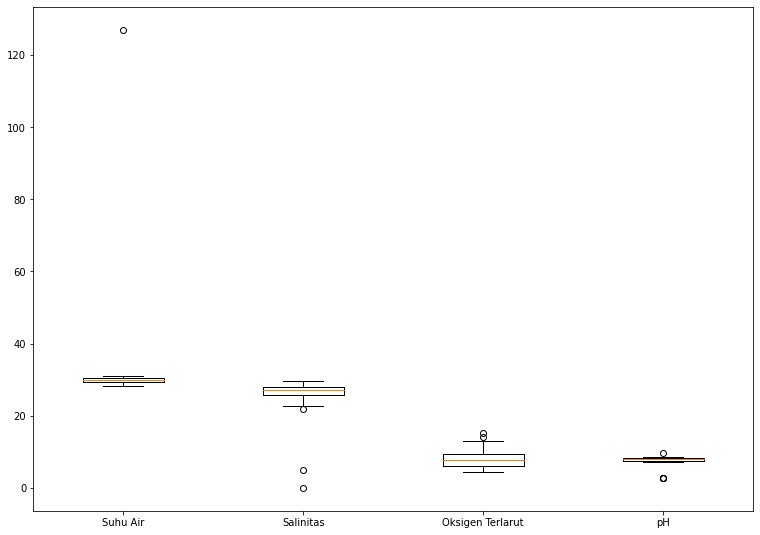

In [ ]:
data = [kolam2266sore['Suhu Air'], kolam2266sore['Salinitas'], kolam2266sore['Oksigen Terlarut'], kolam2266sore['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Suhu Air
# Q1, Q3, dan IQR
Q1 = kolam2266sore['Suhu Air'].quantile(0.25)
Q3 = kolam2266sore['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266sore.shape)

# Removing outliers
kolam2266soreSA = kolam2266sore[~((kolam2266sore['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam2266sore['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266soreSA.shape)

Shape awal:  (34, 12)
Shape akhir:  (33, 12)


In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam2266sore['Salinitas'].quantile(0.25)
Q3 = kolam2266sore['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266sore.shape)

# Removing outliers
kolam2266soreS = kolam2266sore[~((kolam2266sore['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam2266sore['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266soreS.shape)

Shape awal:  (34, 12)
Shape akhir:  (31, 12)


In [ ]:
##Remove Outlier Column OT
# Q1, Q3, dan IQR
Q1 = kolam2266sore['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam2266sore['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266sore.shape)

# Removing outliers
kolam2266soreOT = kolam2266sore[~((kolam2266sore['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam2266sore['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266soreOT.shape)

Shape awal:  (34, 12)
Shape akhir:  (32, 12)


In [ ]:
##Remove Outlier Column pH
# Q1, Q3, dan IQR
Q1 = kolam2266sore['pH'].quantile(0.25)
Q3 = kolam2266sore['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam2266sore.shape)

# Removing outliers
kolam2266sorepH = kolam2266sore[~((kolam2266sore['pH'] < (Q1 - 1.5 * IQR)) | (kolam2266sore['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam2266sorepH.shape)

Shape awal:  (34, 12)
Shape akhir:  (29, 12)


In [ ]:
print('Mean Suhu Air: ', kolam2266soreSA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam2266soreOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam2266soreS['Salinitas'].mean())
print('Mean pH: ', kolam2266sorepH['pH'].mean())

Mean Suhu Air:  29.751212121212117
Mean Oksigen Terlarut:  7.6809375
Mean Salinitas:  27.017419354838704
Mean pH:  8.049655172413791


## **Kolam 3**

In [ ]:
kolam3= df3[df3['Kode Kolam']==3]
kolam3

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
134,2018-08-01 17:24:27+07:00,66,29.19,8.40,31.13,8.24,2018,8,1,17,Sore,3
135,2018-08-02 06:29:45+07:00,66,26.44,10.69,31.76,8.14,2018,8,2,6,Pagi,3
136,2018-08-02 17:23:23+07:00,66,28.69,9.94,31.51,8.32,2018,8,2,17,Sore,3
137,2018-08-03 06:29:24+07:00,66,25.69,4.92,31.56,7.90,2018,8,3,6,Pagi,3
138,2018-08-03 16:46:57+07:00,66,27.81,0.00,31.78,8.21,2018,8,3,16,Sore,3
...,...,...,...,...,...,...,...,...,...,...,...,...
286,2018-11-04 16:51:19+07:00,66,30.44,1.86,25.60,8.81,2018,11,4,16,Sore,3
287,2018-11-05 06:02:52+07:00,66,28.38,5.93,24.20,8.21,2018,11,5,6,Pagi,3
288,2018-11-06 07:05:47+07:00,66,28.25,5.52,23.81,8.16,2018,11,6,7,Pagi,3
289,2018-11-06 17:02:16+07:00,66,28.63,6.25,23.22,8.46,2018,11,6,17,Sore,3


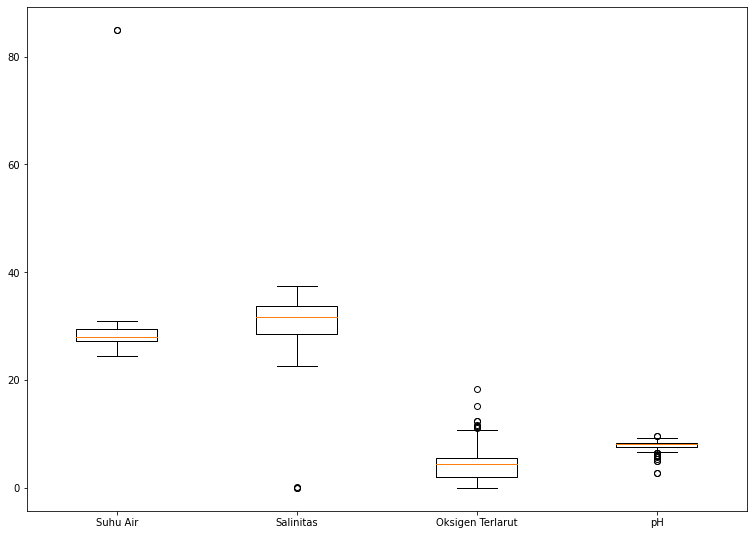

In [ ]:
import matplotlib.pyplot as plt

data = [kolam3['Suhu Air'], kolam3['Salinitas'], kolam3['Oksigen Terlarut'], kolam3['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3['Suhu Air'].quantile(0.25)
Q3 = kolam3['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3.shape)

# Removing outliers
kolam3SA = kolam3[~((kolam3['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam3['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3SA.shape)

Shape awal:  (157, 12)
Shape akhir:  (155, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3['Salinitas'].quantile(0.25)
Q3 = kolam3['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3.shape)

# Removing outliers
kolam3S = kolam3[~((kolam3['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam3['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3S.shape)

Shape awal:  (157, 12)
Shape akhir:  (154, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam3['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3.shape)

# Removing outliers
kolam3OT = kolam3[~((kolam3['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam3['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3OT.shape)

Shape awal:  (157, 12)
Shape akhir:  (149, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3['pH'].quantile(0.25)
Q3 = kolam3['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3.shape)

# Removing outliers
kolam3pH = kolam3[~((kolam3['pH'] < (Q1 - 1.5 * IQR)) | (kolam3['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3pH.shape)

Shape awal:  (157, 12)
Shape akhir:  (142, 12)


In [ ]:
print('Mean Suhu Air : ', kolam3SA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3OT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3S['Salinitas'].mean())
print('Mean pH: ', kolam3pH['pH'].mean())

Mean Suhu Air :  28.088064516129048
Mean Oksigen Terlarut:  4.147785234899327
Mean Salinitas:  31.305259740259743
Mean pH:  8.08288732394366


### **kolam3 Pagi**


In [ ]:
kolam3pagi= kolam3[kolam3['keterangan']=='Pagi']
kolam3pagi.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
135,2018-08-02 06:29:45+07:00,66,26.44,10.69,31.76,8.14,2018,8,2,6,Pagi,3
137,2018-08-03 06:29:24+07:00,66,25.69,4.92,31.56,7.90,2018,8,3,6,Pagi,3
140,2018-08-05 06:30:12+07:00,66,25.56,12.38,32.40,7.72,2018,8,5,6,Pagi,3
142,2018-08-06 06:33:54+07:00,66,24.50,11.68,32.60,7.74,2018,8,6,6,Pagi,3
144,2018-08-07 07:07:07+07:00,66,24.44,11.50,32.97,7.58,2018,8,7,7,Pagi,3


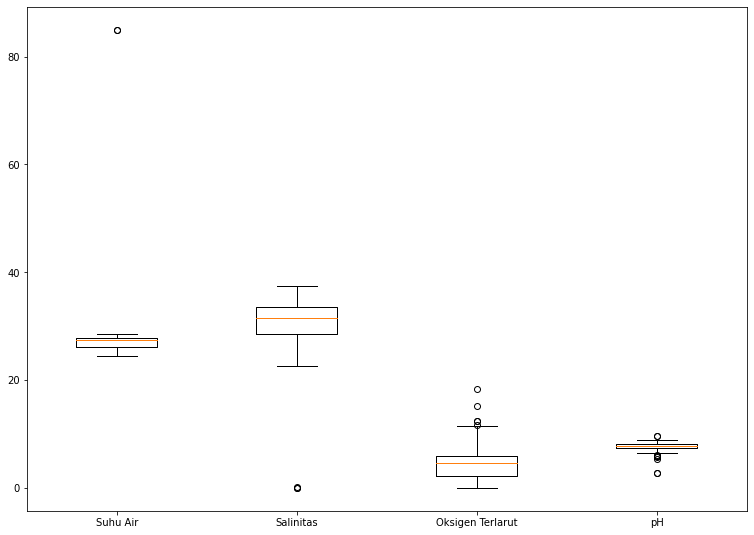

In [ ]:
data = [kolam3pagi['Suhu Air'], kolam3pagi['Salinitas'], kolam3pagi['Oksigen Terlarut'], kolam3pagi['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam3pagi['Suhu Air'].quantile(0.25)
Q3 = kolam3pagi['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3pagi.shape)

# Removing outliers
kolam3pagiSA = kolam3pagi[~((kolam3pagi['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam3pagi['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3pagiSA.shape)

Shape awal:  (82, 12)
Shape akhir:  (80, 12)


In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam3pagi['Salinitas'].quantile(0.25)
Q3 = kolam3pagi['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3pagi.shape)

# Removing outliers
kolam3pagiS = kolam3pagi[~((kolam3pagi['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam3pagi['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3pagiS.shape)

Shape awal:  (82, 12)
Shape akhir:  (79, 12)


In [ ]:
##Remove Outlier Column Oksigen Terlarut
# Q1, Q3, dan IQR
Q1 = kolam3pagi['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam3pagi['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3pagi.shape)

# Removing outliers
kolam3pagiOT = kolam3pagi[~((kolam3pagi['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam3pagi['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3pagiOT.shape)

Shape awal:  (82, 12)
Shape akhir:  (77, 12)


In [ ]:
##Remove Outlier Column pH
# Q1, Q3, dan IQR
Q1 = kolam3pagi['pH'].quantile(0.25)
Q3 = kolam3pagi['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3pagi.shape)

# Removing outliers
kolam3pagipH = kolam3pagi[~((kolam3pagi['pH'] < (Q1 - 1.5 * IQR)) | (kolam3pagi['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3pagipH.shape)

Shape awal:  (82, 12)
Shape akhir:  (73, 12)


In [ ]:
print('Mean Suhu Air: ', kolam3pagiSA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3pagiOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3pagiS['Salinitas'].mean())
print('Mean pH: ', kolam3pagipH['pH'].mean())

Mean Suhu Air:  26.91700000000002
Mean Oksigen Terlarut:  4.5316883116883115
Mean Salinitas:  31.243417721518988
Mean pH:  7.752465753424659


### **kolam3 Sore**

In [ ]:
kolam3sore= kolam3[kolam3['keterangan']=='Sore']
kolam3sore.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
134,2018-08-01 17:24:27+07:00,66,29.19,8.40,31.13,8.24,2018,8,1,17,Sore,3
136,2018-08-02 17:23:23+07:00,66,28.69,9.94,31.51,8.32,2018,8,2,17,Sore,3
138,2018-08-03 16:46:57+07:00,66,27.81,0.00,31.78,8.21,2018,8,3,16,Sore,3
139,2018-08-04 17:04:07+07:00,66,28.06,9.67,32.40,8.09,2018,8,4,17,Sore,3
141,2018-08-05 17:03:07+07:00,66,27.88,11.04,32.50,8.01,2018,8,5,17,Sore,3


In [ ]:
kolam3sore[['Suhu Air','Oksigen Terlarut','Salinitas','pH']].describe()

,Suhu Air,Oksigen Terlarut,Salinitas,pH
count,75.000000,75.000000,75.00000,75.000000
mean,29.337200,4.038000,31.37040,8.236133
std,0.925317,2.335129,3.40027,0.645110
min,26.880000,0.000000,23.22000,5.010000
25%,28.690000,1.955000,28.67000,8.085000
50%,29.500000,4.260000,31.70000,8.300000
75%,30.065000,5.150000,33.85500,8.560000
max,31.000000,11.040000,37.23000,9.200000


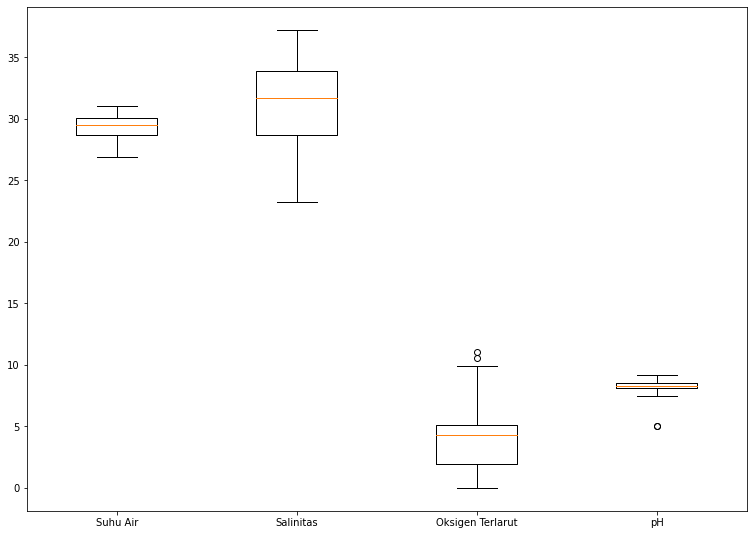

In [ ]:
data = [kolam3sore['Suhu Air'], kolam3sore['Salinitas'], kolam3sore['Oksigen Terlarut'], kolam3sore['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column OT
# Q1, Q3, dan IQR
Q1 = kolam3sore['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam3sore['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3sore.shape)

# Removing outliers
kolam3soreOT = kolam3sore[~((kolam3sore['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam3sore['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3soreOT.shape)

Shape awal:  (75, 12)
Shape akhir:  (73, 12)


In [ ]:
##Remove Outlier Column pH
# Q1, Q3, dan IQR
Q1 = kolam3sore['pH'].quantile(0.25)
Q3 = kolam3sore['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3sore.shape)

# Removing outliers
kolam3sorepH = kolam3sore[~((kolam3sore['pH'] < (Q1 - 1.5 * IQR)) | (kolam3sore['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3sorepH.shape)

Shape awal:  (75, 12)
Shape akhir:  (73, 12)


In [ ]:
print('Mean Suhu Air: ', kolam3sore['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3soreOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3sore['Salinitas'].mean())
print('Mean pH: ', kolam3sorepH['pH'].mean())

Mean Suhu Air:  29.337200000000017
Mean Oksigen Terlarut:  3.8530136986301367
Mean Salinitas:  31.37039999999999
Mean pH:  8.324109589041097


## **Kolam 3418**

In [ ]:
kolam3418= df3[df3['Kode Kolam']==3418]
kolam3418

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
291,2019-02-08 16:43:31+07:00,295,29.63,5.37,39.74,7.73,2019,2,8,16,Sore,3418
292,2019-02-09 09:26:01+07:00,295,28.69,5.39,39.56,7.72,2019,2,9,9,Pagi,3418
293,2019-02-09 15:59:49+07:00,295,29.69,5.46,39.63,7.84,2019,2,9,15,Siang,3418
294,2019-02-09 21:07:13+07:00,295,29.25,4.82,39.72,7.75,2019,2,9,21,Malam,3418
295,2019-02-10 08:09:37+07:00,295,28.44,5.00,39.56,7.71,2019,2,10,8,Pagi,3418
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2019-03-02 16:32:00+07:00,295,29.94,6.54,38.52,8.42,2019,3,2,16,Sore,3418
355,2019-03-02 20:43:46+07:00,295,29.69,3.93,38.70,8.01,2019,3,2,20,Malam,3418
356,2019-03-03 07:02:07+07:00,295,28.94,4.32,38.55,7.45,2019,3,3,7,Pagi,3418
357,2019-03-03 16:57:10+07:00,295,28.81,4.85,38.52,7.76,2019,3,3,16,Sore,3418


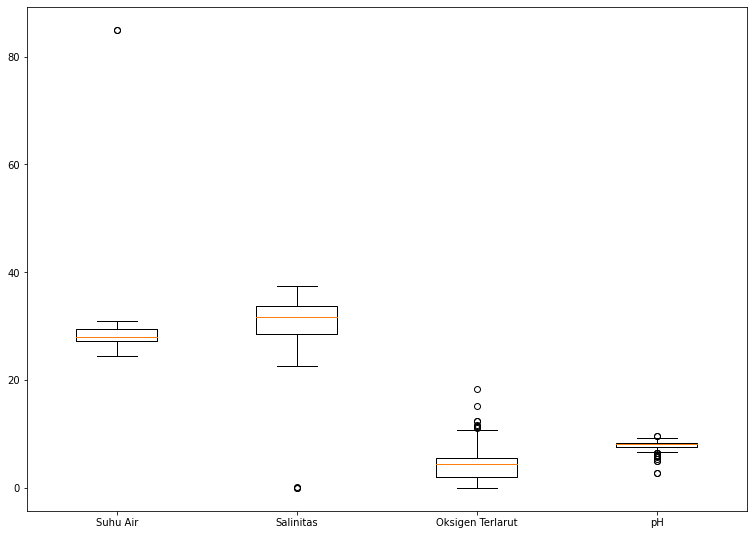

In [ ]:
import matplotlib.pyplot as plt

data = [kolam3['Suhu Air'], kolam3['Salinitas'], kolam3['Oksigen Terlarut'], kolam3['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3418['Suhu Air'].quantile(0.25)
Q3 = kolam3418['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3418.shape)

# Removing outliers
kolam3418SA = kolam3418[~((kolam3418['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam3418['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3418SA.shape)

Shape awal:  (68, 12)
Shape akhir:  (67, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3418['Salinitas'].quantile(0.25)
Q3 = kolam3418['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3418.shape)

# Removing outliers
kolam3418S = kolam3418[~((kolam3418['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam3418['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3418S.shape)

Shape awal:  (68, 12)
Shape akhir:  (67, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3418['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam3418['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3418.shape)

# Removing outliers
kolam3418OT = kolam3418[~((kolam3418['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam3418['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3418OT.shape)

Shape awal:  (68, 12)
Shape akhir:  (68, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3418['pH'].quantile(0.25)
Q3 = kolam3418['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3418.shape)

# Removing outliers
kolam3418pH = kolam3418[~((kolam3418['pH'] < (Q1 - 1.5 * IQR)) | (kolam3418['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3418pH.shape)

Shape awal:  (68, 12)
Shape akhir:  (68, 12)


In [ ]:
print('Mean Suhu Air : ', kolam3418SA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3418OT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3418S['Salinitas'].mean())
print('Mean pH: ', kolam3418pH['pH'].mean())

Mean Suhu Air :  29.405970149253744
Mean Oksigen Terlarut:  4.955
Mean Salinitas:  38.67074626865673
Mean pH:  7.850882352941177


### **kolam3418 Pagi**


In [ ]:
kolam3418pagi= kolam3418[kolam3418['keterangan']=='Pagi']
kolam3418pagi.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
292,2019-02-09 09:26:01+07:00,295,28.69,5.39,39.56,7.72,2019,2,9,9,Pagi,3418
295,2019-02-10 08:09:37+07:00,295,28.44,5.00,39.56,7.71,2019,2,10,8,Pagi,3418
298,2019-02-11 07:53:59+07:00,295,27.94,5.09,39.68,7.68,2019,2,11,7,Pagi,3418
301,2019-02-12 07:40:17+07:00,295,27.75,5.28,39.52,7.70,2019,2,12,7,Pagi,3418
304,2019-02-13 07:22:56+07:00,295,28.25,4.88,39.23,7.63,2019,2,13,7,Pagi,3418


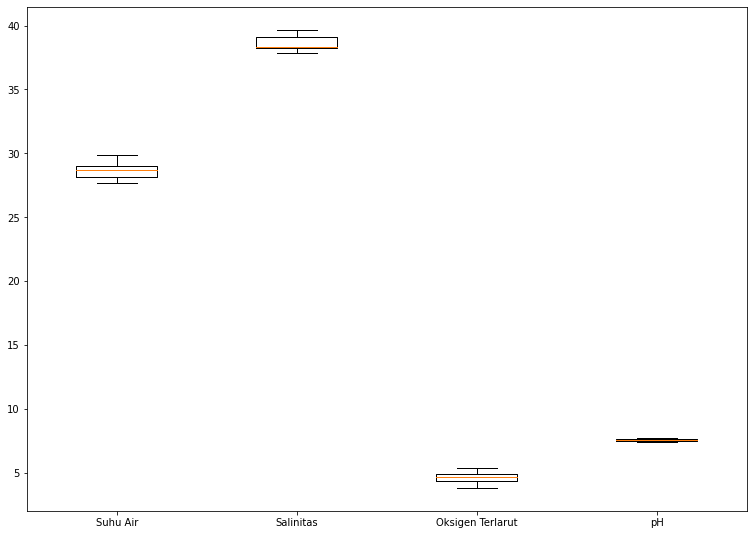

In [ ]:
data = [kolam3418pagi['Suhu Air'], kolam3418pagi['Salinitas'], kolam3418pagi['Oksigen Terlarut'], kolam3418pagi['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
print('Mean Suhu Air', kolam3418pagi['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3418pagi['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3418pagi['Salinitas'].mean())
print('Mean pH: ', kolam3418pagi['pH'].mean())

Mean Suhu Air 28.64363636363636
Mean Oksigen Terlarut:  4.660454545454545
Mean Salinitas:  38.61545454545455
Mean pH:  7.557727272727272


### **kolam3418 Sore**

In [ ]:
kolam3418sore= kolam3418[kolam3418['keterangan']=='Sore']
kolam3418sore.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
291,2019-02-08 16:43:31+07:00,295,29.63,5.37,39.74,7.73,2019,2,8,16,Sore,3418
296,2019-02-10 16:02:42+07:00,295,29.38,5.23,39.63,7.85,2019,2,10,16,Sore,3418
299,2019-02-11 16:20:07+07:00,295,29.19,5.87,39.43,7.91,2019,2,11,16,Sore,3418
305,2019-02-13 16:15:31+07:00,295,29.69,6.18,39.35,8.09,2019,2,13,16,Sore,3418
308,2019-02-14 16:17:03+07:00,295,29.56,6.64,39.59,8.06,2019,2,14,16,Sore,3418


In [ ]:
kolam3418sore[['Suhu Air','Oksigen Terlarut','Salinitas','pH']].describe()

,Suhu Air,Oksigen Terlarut,Salinitas,pH
count,34.000000,34.000000,34.000000,34.000000
mean,32.611471,8.093824,25.428824,7.490000
std,16.694797,2.620658,6.159046,1.773932
min,28.190000,4.300000,0.000000,2.860000
25%,29.300000,6.002500,25.630000,7.552500
50%,29.970000,7.690000,27.050000,8.135000
75%,30.377500,9.267500,27.967500,8.320000
max,127.000000,15.200000,29.660000,9.770000


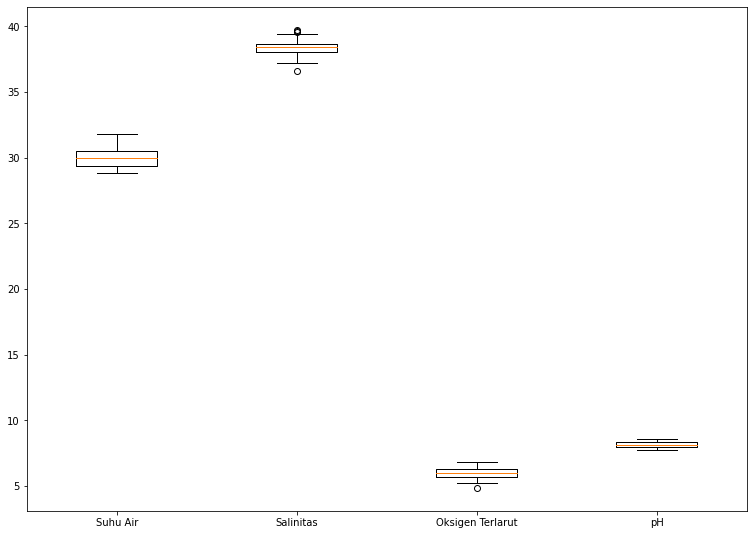

In [ ]:
data = [kolam3418sore['Suhu Air'], kolam3418sore['Salinitas'], kolam3418sore['Oksigen Terlarut'], kolam3418sore['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam3418sore['Salinitas'].quantile(0.25)
Q3 = kolam3418sore['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3418sore.shape)

# Removing outliers
kolam3418soreS = kolam3418sore[~((kolam3418sore['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam3418sore['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3418soreS.shape)

Shape awal:  (21, 12)
Shape akhir:  (17, 12)


In [ ]:
##Remove Outlier Column OT
# Q1, Q3, dan IQR
Q1 = kolam3418sore['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam3418sore['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3418sore.shape)

# Removing outliers
kolam3418soreOT = kolam3418sore[~((kolam3418sore['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam3418sore['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3418soreOT.shape)

Shape awal:  (21, 12)
Shape akhir:  (20, 12)


In [ ]:
print('Mean Suhu Air: ', kolam3418sore['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3418soreOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3418soreS['Salinitas'].mean())
print('Mean pH: ', kolam3418sore['pH'].mean())

Mean Suhu Air:  30.03428571428571
Mean Oksigen Terlarut:  6.066000000000001
Mean Salinitas:  38.36647058823529
Mean pH:  8.138571428571428


## **Kolam 3421**

In [ ]:
kolam3421= df3[df3['Kode Kolam']==3421]
kolam3421

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
359,2019-02-08 16:35:21+07:00,298,29.50,5.21,38.91,7.74,2019,2,8,16,Sore,3421
360,2019-02-09 09:19:16+07:00,298,28.31,5.41,38.89,7.75,2019,2,9,9,Pagi,3421
361,2019-02-09 15:53:05+07:00,298,29.50,4.91,38.71,7.77,2019,2,9,15,Siang,3421
362,2019-02-09 21:01:14+07:00,298,29.00,5.02,38.84,7.73,2019,2,9,21,Malam,3421
363,2019-02-10 08:02:55+07:00,298,28.00,4.94,38.72,7.74,2019,2,10,8,Pagi,3421
...,...,...,...,...,...,...,...,...,...,...,...,...
438,2019-03-08 07:14:17+07:00,298,27.25,4.33,36.14,7.44,2019,3,8,7,Pagi,3421
439,2019-03-08 16:43:59+07:00,298,29.63,4.39,36.26,7.58,2019,3,8,16,Sore,3421
440,2019-03-08 21:51:11+07:00,298,28.88,4.16,36.44,7.49,2019,3,8,21,Malam,3421
441,2019-03-09 07:44:42+07:00,298,28.00,4.09,36.35,7.43,2019,3,9,7,Pagi,3421


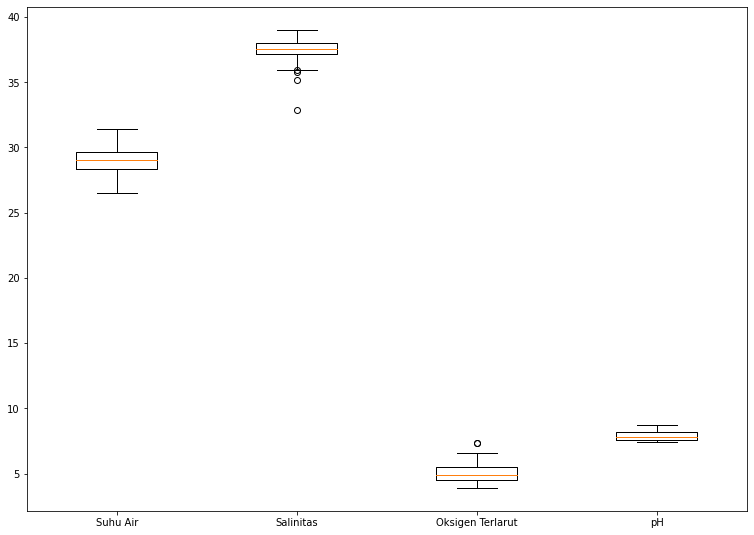

In [ ]:
import matplotlib.pyplot as plt

data = [kolam3421['Suhu Air'], kolam3421['Salinitas'], kolam3421['Oksigen Terlarut'], kolam3421['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3421['Salinitas'].quantile(0.25)
Q3 = kolam3421['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3421.shape)

# Removing outliers
kolam3421S = kolam3421[~((kolam3421['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam3421['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3421S.shape)

Shape awal:  (84, 12)
Shape akhir:  (80, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam3421['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam3421['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3421.shape)

# Removing outliers
kolam3421OT = kolam3421[~((kolam3421['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam3421['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3421OT.shape)

Shape awal:  (84, 12)
Shape akhir:  (82, 12)


In [ ]:
print('Mean Suhu Air : ', kolam3421['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3421OT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3421S['Salinitas'].mean())
print('Mean pH: ', kolam3421['pH'].mean())

Mean Suhu Air :  29.020357142857154
Mean Oksigen Terlarut:  4.984024390243903
Mean Salinitas:  37.65499999999999
Mean pH:  7.92


### **kolam3421 Pagi**


In [ ]:
kolam3421pagi= kolam3421[kolam3421['keterangan']=='Pagi']
kolam3421pagi.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
360,2019-02-09 09:19:16+07:00,298,28.31,5.41,38.89,7.75,2019,2,9,9,Pagi,3421
363,2019-02-10 08:02:55+07:00,298,28.00,4.94,38.72,7.74,2019,2,10,8,Pagi,3421
366,2019-02-11 07:47:27+07:00,298,27.69,5.06,38.89,7.71,2019,2,11,7,Pagi,3421
369,2019-02-12 07:34:59+07:00,298,27.56,5.50,38.58,7.73,2019,2,12,7,Pagi,3421
372,2019-02-13 07:15:31+07:00,298,27.88,5.08,38.56,7.74,2019,2,13,7,Pagi,3421


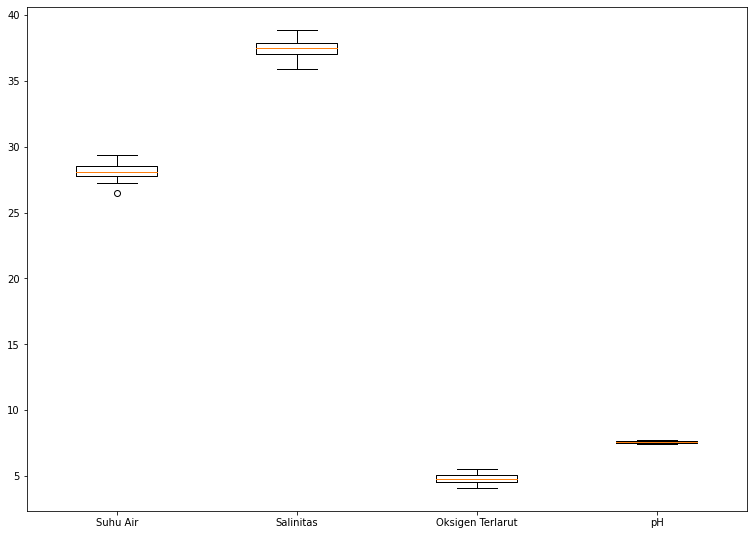

In [ ]:
data = [kolam3421pagi['Suhu Air'], kolam3421pagi['Salinitas'], kolam3421pagi['Oksigen Terlarut'], kolam3421pagi['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam3421pagi['Suhu Air'].quantile(0.25)
Q3 = kolam3421pagi['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3421pagi.shape)

# Removing outliers
kolam3421pagiSA = kolam3421pagi[~((kolam3421pagi['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam3421pagi['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3421pagiSA.shape)

Shape awal:  (29, 12)
Shape akhir:  (28, 12)


In [ ]:
print('Mean Suhu Air', kolam3421pagiSA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3421pagi['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3421pagi['Salinitas'].mean())
print('Mean pH: ', kolam3421pagi['pH'].mean())

Mean Suhu Air 28.219642857142848
Mean Oksigen Terlarut:  4.814137931034483
Mean Salinitas:  37.55275862068965
Mean pH:  7.57344827586207


### **kolam3421 Sore**

In [ ]:
kolam3421sore= kolam3421[kolam3421['keterangan']=='Sore']
kolam3421sore.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
359,2019-02-08 16:35:21+07:00,298,29.50,5.21,38.91,7.74,2019,2,8,16,Sore,3421
367,2019-02-11 16:12:50+07:00,298,28.94,5.30,38.38,7.75,2019,2,11,16,Sore,3421
373,2019-02-13 16:07:44+07:00,298,29.44,5.59,38.75,7.96,2019,2,13,16,Sore,3421
376,2019-02-14 16:11:07+07:00,298,29.31,6.31,38.99,8.08,2019,2,14,16,Sore,3421
379,2019-02-15 16:55:35+07:00,298,28.94,6.42,37.16,8.25,2019,2,15,16,Sore,3421


In [ ]:
kolam3421sore[['Suhu Air','Oksigen Terlarut','Salinitas','pH']].describe()

,Suhu Air,Oksigen Terlarut,Salinitas,pH
count,25.000000,25.000000,25.000000,25.000000
mean,29.735600,5.704800,37.514000,8.230400
std,0.906739,0.584039,0.796628,0.358033
min,27.690000,4.390000,35.930000,7.570000
25%,29.130000,5.300000,37.220000,7.960000
50%,29.810000,5.830000,37.590000,8.340000
75%,30.310000,6.110000,37.790000,8.530000
max,31.440000,6.590000,38.990000,8.700000


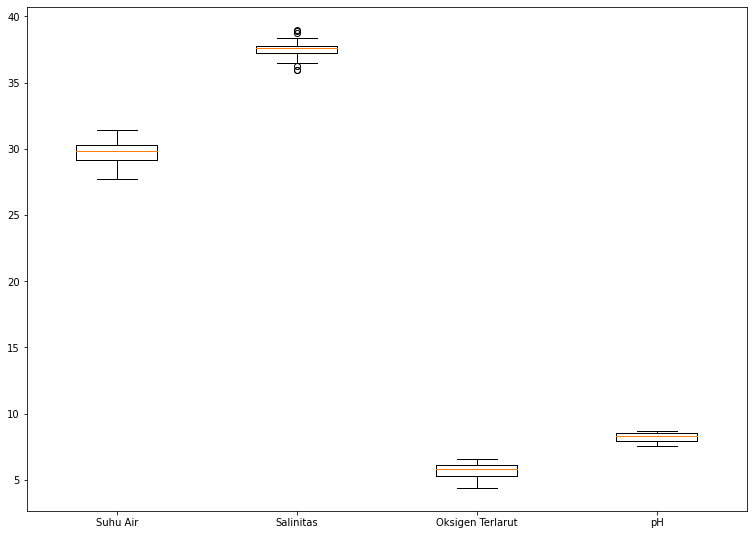

In [ ]:
data = [kolam3421sore['Suhu Air'], kolam3421sore['Salinitas'], kolam3421sore['Oksigen Terlarut'], kolam3421sore['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam3421sore['Salinitas'].quantile(0.25)
Q3 = kolam3421sore['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam3421sore.shape)

# Removing outliers
kolam3421soreS = kolam3421sore[~((kolam3421sore['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam3421sore['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam3421soreS.shape)

Shape awal:  (25, 12)
Shape akhir:  (19, 12)


In [ ]:
print('Mean Suhu Air: ', kolam3421sore['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam3421sore['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam3421soreS['Salinitas'].mean())
print('Mean pH: ', kolam3421sore['pH'].mean())

Mean Suhu Air:  29.735599999999994
Mean Oksigen Terlarut:  5.7048000000000005
Mean Salinitas:  37.52947368421053
Mean pH:  8.230400000000001


## **Kolam 4**

In [ ]:
kolam4= df3[df3['Kode Kolam']==4]
kolam4

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
443,2019-05-19 07:00:00+07:00,812,30.00,6.30,25.00,8.20,2019,5,19,7,Pagi,4
444,2019-05-21 07:00:00+07:00,812,27.00,4.80,32.00,7.70,2019,5,21,7,Pagi,4
445,2019-05-22 07:00:00+07:00,812,27.00,5.00,32.00,7.80,2019,5,22,7,Pagi,4
446,2019-05-23 07:00:00+07:00,812,27.00,5.70,33.00,7.50,2019,5,23,7,Pagi,4
447,2019-05-24 07:00:00+07:00,812,27.00,6.20,33.00,7.50,2019,5,24,7,Pagi,4
...,...,...,...,...,...,...,...,...,...,...,...,...
510,2019-07-29 07:32:21+07:00,812,24.85,6.58,28.09,7.00,2019,7,29,7,Pagi,4
511,2019-07-29 16:16:36+07:00,812,27.72,7.10,28.31,8.16,2019,7,29,16,Sore,4
512,2019-07-29 16:16:38+07:00,812,27.59,7.10,28.31,8.16,2019,7,29,16,Sore,4
513,2019-07-30 16:09:59+07:00,812,28.44,7.65,28.00,7.86,2019,7,30,16,Sore,4


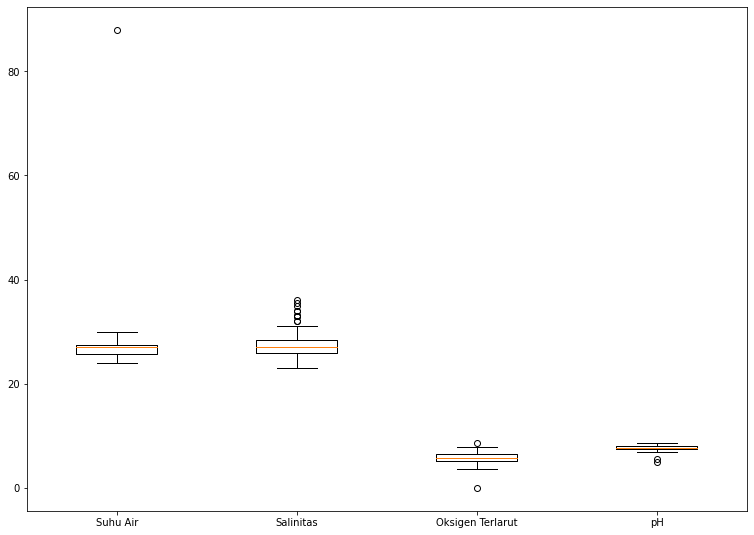

In [ ]:
import matplotlib.pyplot as plt

data = [kolam4['Suhu Air'], kolam4['Salinitas'], kolam4['Oksigen Terlarut'], kolam4['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam4['Suhu Air'].quantile(0.25)
Q3 = kolam4['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4.shape)

# Removing outliers
kolam4SA = kolam4[~((kolam4['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam4['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4SA.shape)

Shape awal:  (72, 12)
Shape akhir:  (71, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam4['Salinitas'].quantile(0.25)
Q3 = kolam4['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4.shape)

# Removing outliers
kolam4S = kolam4[~((kolam4['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam4['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4S.shape)

Shape awal:  (72, 12)
Shape akhir:  (61, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam4['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam4['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4.shape)

# Removing outliers
kolam4OT = kolam4[~((kolam4['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam4['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4OT.shape)

Shape awal:  (72, 12)
Shape akhir:  (70, 12)


In [ ]:
##Remove Outlier
# Q1, Q3, dan IQR
Q1 = kolam4['pH'].quantile(0.25)
Q3 = kolam4['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4.shape)

# Removing outliers
kolam4pH = kolam4[~((kolam4['pH'] < (Q1 - 1.5 * IQR)) | (kolam4['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4pH.shape)

Shape awal:  (72, 12)
Shape akhir:  (70, 12)


In [ ]:
print('Mean Suhu Air : ', kolam4SA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam4OT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam4S['Salinitas'].mean())
print('Mean pH: ', kolam4pH['pH'].mean())

Mean Suhu Air :  26.59845070422536
Mean Oksigen Terlarut:  5.7892857142857155
Mean Salinitas:  26.6795081967213
Mean pH:  7.707285714285714


### **kolam4 Pagi**


In [ ]:
kolam4pagi= kolam4[kolam4['keterangan']=='Pagi']
kolam4pagi.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
443,2019-05-19 07:00:00+07:00,812,30.0,6.3,25.0,8.2,2019,5,19,7,Pagi,4
444,2019-05-21 07:00:00+07:00,812,27.0,4.8,32.0,7.7,2019,5,21,7,Pagi,4
445,2019-05-22 07:00:00+07:00,812,27.0,5.0,32.0,7.8,2019,5,22,7,Pagi,4
446,2019-05-23 07:00:00+07:00,812,27.0,5.7,33.0,7.5,2019,5,23,7,Pagi,4
447,2019-05-24 07:00:00+07:00,812,27.0,6.2,33.0,7.5,2019,5,24,7,Pagi,4


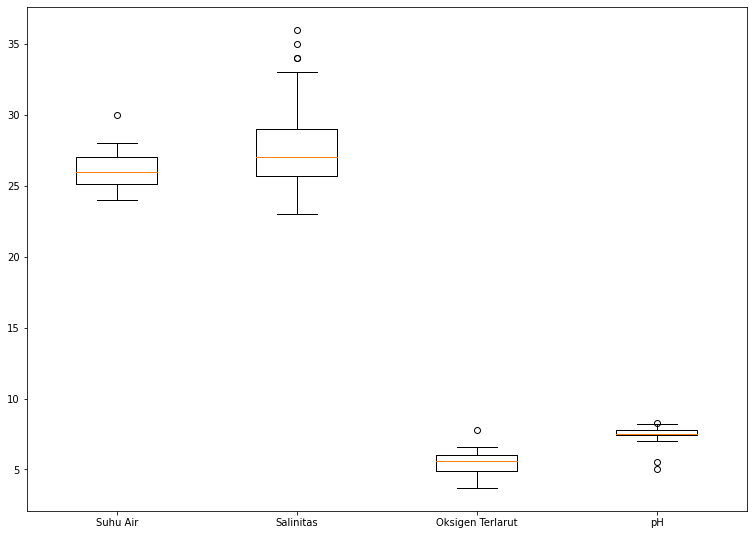

In [ ]:
data = [kolam4pagi['Suhu Air'], kolam4pagi['Salinitas'], kolam4pagi['Oksigen Terlarut'], kolam4pagi['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam4pagi['Suhu Air'].quantile(0.25)
Q3 = kolam4pagi['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4pagi.shape)

# Removing outliers
kolam4pagiSA = kolam4pagi[~((kolam4pagi['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam4pagi['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4pagiSA.shape)

Shape awal:  (41, 12)
Shape akhir:  (40, 12)


In [ ]:
##Remove Outlier Column Salinitas
# Q1, Q3, dan IQR
Q1 = kolam4pagi['Salinitas'].quantile(0.25)
Q3 = kolam4pagi['Salinitas'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4pagi.shape)

# Removing outliers
kolam4pagiS = kolam4pagi[~((kolam4pagi['Salinitas'] < (Q1 - 1.5 * IQR)) | (kolam4pagi['Salinitas'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4pagiS.shape)

Shape awal:  (41, 12)
Shape akhir:  (37, 12)


In [ ]:
##Remove Outlier Column Oksigen Terlarut
# Q1, Q3, dan IQR
Q1 = kolam4pagi['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam4pagi['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4pagi.shape)

# Removing outliers
kolam4pagiOT = kolam4pagi[~((kolam4pagi['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam4pagi['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4pagiOT.shape)

Shape awal:  (41, 12)
Shape akhir:  (40, 12)


In [ ]:
##Remove Outlier Column pH
# Q1, Q3, dan IQR
Q1 = kolam4pagi['pH'].quantile(0.25)
Q3 = kolam4pagi['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4pagi.shape)

# Removing outliers
kolam4pagipH = kolam4pagi[~((kolam4pagi['pH'] < (Q1 - 1.5 * IQR)) | (kolam4pagi['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4pagipH.shape)

Shape awal:  (41, 12)
Shape akhir:  (38, 12)


In [ ]:
print('Mean Suhu Air', kolam4pagiSA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam4pagiOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam4pagiS['Salinitas'].mean())
print('Mean pH: ', kolam4pagipH['pH'].mean())

Mean Suhu Air 25.945249999999994
Mean Oksigen Terlarut:  5.402750000000001
Mean Salinitas:  27.329189189189194
Mean pH:  7.56763157894737


### **kolam4 Sore**

In [ ]:
kolam4sore= kolam4[kolam4['keterangan']=='Sore']
kolam4sore.head()

,Waktu Pengukuran,Kode Siklus,Suhu Air,Oksigen Terlarut,Salinitas,pH,tahun,bulan,day,jam,keterangan,Kode Kolam
458,2019-06-23 17:15:56+07:00,812,27.38,5.77,24.00,8.19,2019,6,23,17,Sore,4
459,2019-06-24 17:12:08+07:00,812,28.25,5.36,24.00,8.24,2019,6,24,17,Sore,4
465,2019-06-28 17:12:18+07:00,812,26.97,6.59,23.00,8.56,2019,6,28,17,Sore,4
486,2019-07-18 17:01:10+07:00,812,88.00,0.00,29.12,8.34,2019,7,18,17,Sore,4
487,2019-07-18 17:01:45+07:00,812,28.40,6.27,27.38,8.00,2019,7,18,17,Sore,4


In [ ]:
kolam4sore[['Suhu Air','Oksigen Terlarut','Salinitas','pH']].describe()

,Suhu Air,Oksigen Terlarut,Salinitas,pH
count,34.000000,34.000000,34.000000,34.000000
mean,32.611471,8.093824,25.428824,7.490000
std,16.694797,2.620658,6.159046,1.773932
min,28.190000,4.300000,0.000000,2.860000
25%,29.300000,6.002500,25.630000,7.552500
50%,29.970000,7.690000,27.050000,8.135000
75%,30.377500,9.267500,27.967500,8.320000
max,127.000000,15.200000,29.660000,9.770000


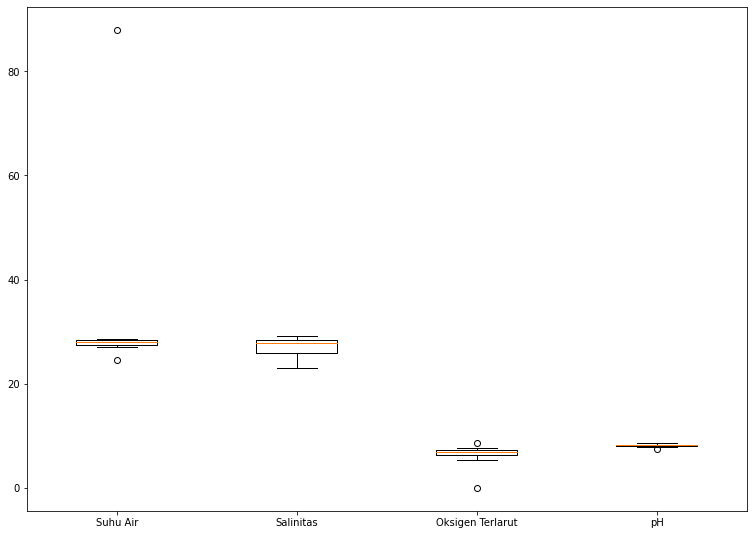

In [ ]:
data = [kolam4sore['Suhu Air'], kolam4sore['Salinitas'], kolam4sore['Oksigen Terlarut'], kolam4sore['pH']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Suhu Air', 'Salinitas',
                    'Oksigen Terlarut', 'pH'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
##Remove Outlier Column Suhu Air
# Q1, Q3, dan IQR
Q1 = kolam4sore['Suhu Air'].quantile(0.25)
Q3 = kolam4sore['Suhu Air'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4sore.shape)

# Removing outliers
kolam4soreSA = kolam4sore[~((kolam4sore['Suhu Air'] < (Q1 - 1.5 * IQR)) | (kolam4sore['Suhu Air'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4soreSA.shape)

Shape awal:  (13, 12)
Shape akhir:  (11, 12)


In [ ]:
##Remove Outlier Column OT
# Q1, Q3, dan IQR
Q1 = kolam4sore['Oksigen Terlarut'].quantile(0.25)
Q3 = kolam4sore['Oksigen Terlarut'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4sore.shape)

# Removing outliers
kolam4soreOT = kolam4sore[~((kolam4sore['Oksigen Terlarut'] < (Q1 - 1.5 * IQR)) | (kolam4sore['Oksigen Terlarut'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4soreOT.shape)

Shape awal:  (13, 12)
Shape akhir:  (11, 12)


In [ ]:
##Remove Outlier Column pH
# Q1, Q3, dan IQR
Q1 = kolam4sore['pH'].quantile(0.25)
Q3 = kolam4sore['pH'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', kolam4sore.shape)

# Removing outliers
kolam4sorepH = kolam4sore[~((kolam4sore['pH'] < (Q1 - 1.5 * IQR)) | (kolam4sore['pH'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', kolam4sorepH.shape)

Shape awal:  (13, 12)
Shape akhir:  (12, 12)


In [ ]:
print('Mean Suhu Air: ', kolam4soreSA['Suhu Air'].mean())
print('Mean Oksigen Terlarut: ', kolam4soreOT['Oksigen Terlarut'].mean())
print('Mean Salinitas: ', kolam4sore['Salinitas'].mean())
print('Mean pH: ', kolam4sorepH['pH'].mean())

Mean Suhu Air:  27.916363636363634
Mean Oksigen Terlarut:  6.705454545454546
Mean Salinitas:  26.855384615384615
Mean pH:  8.163333333333332
